# Detecting Simpson's Pardox and other Surprising things in data

How can we detect it?
WHat is it? 
WHy is it harder in large

How can it be interactive and do epople have intutition for it?



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

It's generally discussed in terms of two variables, both discrete, though binary or mulit level cases are both poputlar.  A popular example is the berkeley admissions data set.  the claim was that it was iased againt women because t the univerisyt sclae it ws, but fom os depeartments they actually admitted wmen at much higher rates  but the departments tha had low aceptance rates wer the ones with most of the women applicants

# Regression Based SImpson's Paradox


It can manifest in how a decision variable relates to others that $x_k$ is predicted differently for different values of $x_j$ 
another way Simpson's Paradox could manifest is through latent clusters.  It can manifest in relationsships among variables.  

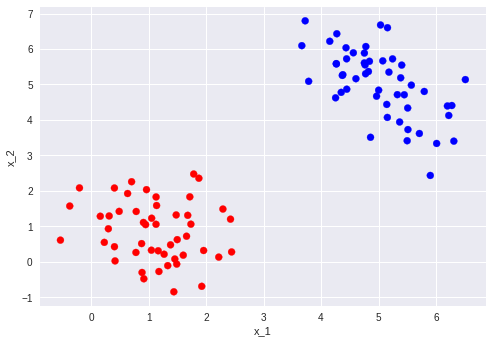

In [3]:
# 
N = 100
# sample data from 2 clusters
mu = np.asarray([[1,1],[5,5]])

z = np.random.randint(0,2,N)
x = np.asarray([np.random.multivariate_normal(mu[z_i],[[.6,-1],[0,.6]]) for z_i in z])

latent_df = pd.DataFrame(data=x,
                       columns = ['x1', 'x2'])

# now we add somoe more columns
color_z = {0:'r', 1:'b'}
char_zy = {0: {0:'x', 1:'o'}, 1:{0:'o', 1:'x'}}

latent_df['color'] = [color_z[z_i] for z_i in z]
y = np.random.choice([0,1],N,p=[.7,.3])
latent_df['y'] = y
latent_df['char'] = [char_zy[zi][yi] for zi,yi in zip(z,y)]

plt.scatter(latent_df['x1'], latent_df['x2'],
            c =  latent_df['color'], marker= 'o')
#plt.scatter(clust_x['x1'], clust_x['x2'],
          #  c =  clust_x['color'], marker= 'x')
plt.xlabel('x_1')
plt.ylabel('x_2')
# , marker = 'char' , c = 'color'
plt.show()

in this, if we ignore the color, x_1 and x_2 are posiiely correlated, but in each color, they're negatively correlated.  

In [4]:
latent_df['x1'].corr(latent_df['x2'])

0.81357053492244347

In [11]:
latent_df.groupby('color')['x1','x2'].corr()


x1        x2
color                       
b     x1  1.000000 -0.651586
      x2 -0.651586  1.000000
r     x1  1.000000 -0.407487
      x2 -0.407487  1.000000

So, we can see that the correlation between $x_1$ and $x_2$ is positive in the whole data set and negative in each subgroup.  This is Simpson's paradox.  Let's see if standard feature selection can be used as a test for this. First, we augment the data to add a feature for the total data set trend.

In [5]:
from sklearn import datasets, linear_model

# this will allow for fitting linear models easily
regr = linear_model.LinearRegression()

# the shapes of dataframes aren't fully compatible with sklearn,
# so we fix it with reshape
regr.fit(latent_df['x1'].reshape(N, 1),latent_df['x2'].reshape(N, 1))
latent_df['x2_x1_total'] = regr.predict(latent_df['x1'].reshape(N, 1))

/home/smb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/smb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Let's look at it again, just to see what we've changed. 

In [6]:
latent_df.head()

,x1,x2,color,y,char,x2_x1_total
0,4.842034,5.654284,b,1,x,4.533925
1,5.900789,2.435572,b,0,o,5.475163
2,5.034966,6.677733,b,0,o,4.705442
3,5.385517,5.188267,b,1,x,5.017083
4,5.327416,4.714018,b,0,o,4.965431


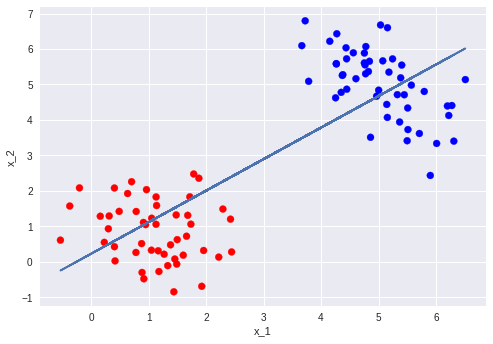

In [7]:
plt.scatter(latent_df['x1'], latent_df['x2'],
            c =  latent_df['color'], marker= 'o')
plt.plot(latent_df['x1'], latent_df['x2_x1_total'])
#plt.scatter(clust_x['x1'], clust_x['x2'],
          #  c =  clust_x['color'], marker= 'x')
plt.xlabel('x_1')
plt.ylabel('x_2')
# , marker = 'char' , c = 'color'
plt.show()